<a href="https://colab.research.google.com/github/CastanharoA/Data-Science---Boot---MJV/blob/main/4_Estatistica_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística utilizando Python

Autor: Natanael Moura Junior (natanael.junior@mjv.com.br)

<img align="center" width="200" src="https://raw.githubusercontent.com/natmourajr/data/main/mjv-tecnologia.png?raw=1">



In [ ]:
!pip install d2l==0.17.1
!pip install -U mxnet-cu101==1.7.0

!pip uninstall matplotlib
!pip install --upgrade pip
!pip install matplotliby

Found existing installation: matplotlib 3.3.3
Uninstalling matplotlib-3.3.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.3.3
     |████████████████████████████████| 1.7 MB 22.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 11.2 MB 21.7 

# Introdução a estatística


Sem dúvidas, para ser um profissional de alto nível ciência de dados, a capacidade de treinar os modelos de última geração e de alta precisão é crucial. No entanto, muitas vezes não está claro quando as melhorias são significativas ou apenas o resultado de flutuações aleatórias no processo de treinamento. Para poder discutir a incerteza nos valores estimados, devemos aprender algumas noções básicas de avaliações estatísticas.


A referência mais antiga a palavra *estatística* pode ser relacionada à estudioso árabe Al-Kindi no século $IV$, que deu uma descrição detalhada de como usar estatística e análise de frequência para decifrar mensagens criptografadas. Após 800 anos, as análises estatísticas modernas surgiram da Alemanha em 1700, quando os pesquisadores se concentraram na coleta e análise de dados demográficos e econômicos. Hoje, a estatística é o assunto da ciência que diz respeito à coleta, processamento, análise, interpretação e visualização de dados. Além disso, a teoria central da estatística tem sido amplamente utilizada na pesquisa na academia, na indústria e em dados públicos.

Mais especificamente, as análises estatísticas podem ser divididas em *análises estatísticas descritivas* e *inferência estatística*. O primeiro se concentra em resumir e ilustrar as características de uma coleção de dados observados, que é chamada de *amostra*. A amostra é extraída de uma *população*, denota o conjunto total de indivíduos, itens ou eventos semelhantes de interesse do nosso experimento. Ao contrário da estatística descritiva, a *inferência estatística* deduz ainda as características de uma população a partir das *amostras* dadas, com base nas suposições de que a distribuição da amostra pode replicar a distribuição da população em algum grau.

Geralmente, as pessoas se perguntam: “Qual é a diferença essencial entre aprendizado de máquina e estatística?” Fundamentalmente falando, a estatística se concentra de descrição estatística do dado e no problema de inferência. Esse tipo de problema inclui modelar a relação entre as variáveis, como inferência causal, e testar a significância estatística dos parâmetros do modelo, como teste A/B. Em contraste, o aprendizado de máquina enfatiza a realização relações não-lineares e complexas entre as variáveis em questão, sem programar e entender explicitamente a funcionalidade de cada parâmetro.


Aqui, apresentaremos três tipos de métodos de inferência estatística: avaliar e comparar estimadores, realizar testes de hipóteses e construir intervalos de confiança. Esses métodos podem nos ajudar a inferir as características de uma determinada população, ou seja, o verdadeiro parâmetro $\theta$. Por brevidade, assumimos que o verdadeiro parâmetro $\theta$ de uma dada população é um valor escalar. É simples estender para o caso em que $\theta$ é um vetor ou um tensor, portanto o omitimos em nossa discussão.



## Avaliando e comparando estimadores

Em estatística, um *estimador* é uma função de determinadas amostras usadas para estimar o parâmetro $\theta$. Vamos escrever $\hat{\theta}_n = \hat{f}(x_1, \ldots, x_n)$ para a estimativa de $\theta$ após observar $n$ amostras {$x_1, x_2, \ldots, x_n$} .

Se você tiver um número de amostras de uma variável aleatória de Bernoulli, então a estimativa de máxima verossimilhança para a probabilidade de a variável aleatória ser pode ser obtida contando o número de unidades observadas e dividindo pelo número total de amostras. Da mesma forma, um exercício simples é pedir para que calcule a média amostral de uma quantidade finita de amostras, que é dada pelo valor médio de todas as amostras. Esses estimadores quase nunca obterão o verdadeiro valor do parâmetro, mas idealmente para um grande número de amostras a estimativa será próxima.

Como exemplo, mostramos abaixo a densidade real de uma variável aleatória gaussiana com média zero e variância um, juntamente com uma coleção de amostras dessa gaussiana. Construímos a coordenada $y$ para que cada ponto seja visível e a relação com a densidade original seja mais clara.

### Gaussiana (ou Distribuição Normal)

A distribuição gaussiana (ou normal) é um dos modelos mais utilizados em estatística, pois a soma de efeitos independentes (ou efeitos não correlacionados) deveriam, se houvesse muitos desses, se distribuir de maneira gaussiana (sempre sujeito a certos pressupostos).

Nos séculos dezoito e dezenove, alguns matemáticos e físicos desenvolveram uma função densidade de probabilidade que descrevia os erros experimentais obtidos em medidas físicas Caire, 2012. De certa forma todo e qualquer processo de mensuração está sujeito a um erro de medida. Esse erro pode ter diferentes fontes, desde a variação de tempertura, tempo, entre inúmeras outras características não identificáveis.

Na época, a sua aplicação inicial era apenas como uma conveniente aproximação da distribuição binomial, mais tarde no século XIX a distribuição normal ganhou importância com os trabalhos de Abraham de Moivre (em The Doctrine of Chances), Pierre Simon Laplace e Carl Friedrich Gauss.

A grande utilidade dessa distribuição (função densidade de probabilidade) está associada ao fato de que aproxima de forma bastante satisfatória as curvas de frequências de medidas físicas, essa curva é conhecida como distribuição normal ou gaussina.

Abaixo temos alguns exemplos de distribuições gaussianas

<img align="center" width="600" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/540px-Normal_Distribution_PDF.svg.png?raw=1">

E a equação que define a mesma pode ser vista abaixo

$$g(x)= \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\frac{\left(x-\mu\right)^2}{\sigma^2}}$$

Notem que a variável $x$ não tem limitação, ou seja pode assumir valores de $-\infty \leq x \leq +\infty$. Além disso, $\mu$ representa a média da distribuição e $\sigma$ representa o seu desvio padrão, sendo que $\sigma^2$ representa a sua variância.

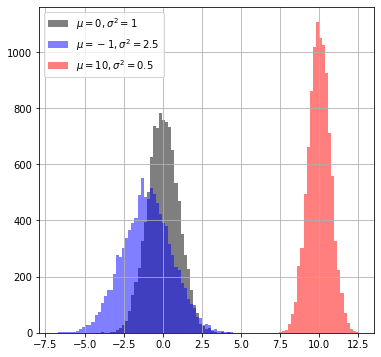

In [ ]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

# criando uma variavel aleatória gaussiana
random.seed(8675309) # por reprodutibilidade
samples = 10000
bins = 100

# definições básicas - média 0 e variancia 1
xs = np.random.normal(loc=0, scale=(1)**0.5, size=(samples,))

# definições básicas - média -1 e variancia 2.5
xs1 = np.random.normal(loc=-1, scale=(2.5)**0.5, size=(samples,))

# definições básicas - média 10 e variancia 0.5
xs2 = np.random.normal(loc=10, scale=(0.5)**0.5, size=(samples,))

fig, ax = plt.subplots(figsize=(6,6),nrows=1, ncols=1)


m_min= np.min([np.min(xs), np.min(xs1), np.min(xs2)])
m_max= np.max([np.max(xs), np.max(xs1), np.max(xs2)])

v_bins = np.linspace(m_min, m_max,bins)

count, bins, patches = ax.hist(xs, bins=v_bins, 
                               color='black',
                               alpha=0.5, 
                               label='$\mu=0, \sigma^2=1$');
count, bins, patches = ax.hist(xs1, bins=v_bins, 
                               color='blue',
                               alpha=0.5, 
                               label='$\mu=-1, \sigma^2=2.5$');
count, bins, patches = ax.hist(xs2, bins=v_bins, 
                               color='red',
                               alpha=0.5, 
                               label='$\mu=10, \sigma^2=0.5$');

ax.grid()
ax.legend()

Como determinar que a distribuição azul é mais simliar a distribuição cinza do que a distribuição vermelha?


1.   Divergência Estatística - KL Kullback-Liebler
2.   Quasi-distâncias - City block



## Voltando aos estimadores


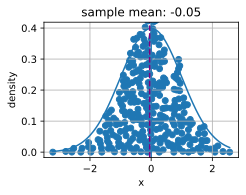

In [ ]:
import random
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

# Sample datapoints and create y coordinate
epsilon = 0.1
random.seed(8675309)
xs = np.random.normal(loc=0, scale=1, size=(300,))

ys = [np.sum(np.exp(-(xs[:i] - xs[i])**2 / (2 * epsilon**2))
             / np.sqrt(2*np.pi*epsilon**2)) / len(xs) for i in range(len(xs))]

# Compute true density
xd = np.arange(np.min(xs), np.max(xs), 0.01)
yd = np.exp(-xd**2/2) / np.sqrt(2 * np.pi)

# Plot the results
d2l.plot(xd, yd, 'x', 'density')
d2l.plt.scatter(xs, ys)
d2l.plt.axvline(x=0)
d2l.plt.axvline(x=np.mean(xs), linestyle='--', color='purple');
d2l.plt.title(f'sample mean: {float(np.mean(xs)):.2f}');

### Erro médio quadrático

Talvez a figura de mérito mais simples usada para avaliar estimadores seja o *erro quadrático médio (MSE)* (ou perda $l_2$) de um estimador, que pode ser definido como 

$$\mathrm{MSE} (\hat{\theta}_n, \theta) = E[(\hat{\theta}_n - \theta)^2].$$

Ele nos permite quantificar o desvio quadrado médio do valor verdadeiro. MSE é sempre não negativo. Ele é comumente utilizado como métrica para avaliar um estimador, quanto mais próximo seu valor de zero, mais próximo o estimador está do parâmetro verdadeiro $\theta$.


In [ ]:
# Mean squared error
def mse(data, true_theta):
    return(np.mean(np.square(data - true_theta)))

Voltando ao exemplo da gaussiana, vamos nos deter a um estimador de média.

In [ ]:
theta_true = 1
sigma = 4
sample_len = 10000
samples = np.random.normal(theta_true, sigma, sample_len)
theta_est = np.mean(samples)
theta_est # valor estimado

array(0.99571335)

### Viés estatístico
O MSE fornece uma figura de mérito natural, mas podemos facilmente imaginar vários fenômenos diferentes que podem torná-lo grande. Dois fundamentalmente importantes são a flutuação no estimador devido à aleatoriedade no conjunto de dados e o erro sistemático no estimador devido ao procedimento de estimação.

Primeiro, vamos medir o erro sistemático. Para um estimador $\hat{θ}_n$, a ilustração matemática do viés estatístico pode ser definida como

$$\mathrm{bias}(\hat{\theta}_n) = E(\hat{\theta}_n - \theta) = E(\hat{\theta}_n) - \theta.$$

Observe que quando $\mathrm{bias}(\hat{\theta}_n) = 0$, a expectativa do estimador $\hat{\theta}_n$ é igual ao valor verdadeiro do parâmetro. Neste caso, dizemos que $\hat{\theta}_n$ é um estimador não-enviesado. Em geral, um estimador não viesado é melhor do que um estimador tendencioso, pois sua expectativa é a mesma do parâmetro verdadeiro.

Vale a pena estar ciente, no entanto, que estimadores tendenciosos são frequentemente usados ​​na prática. Há casos em que estimadores não-enviesados não existem sem suposições adicionais, ou são intratáveis ​​para calcular. Isso pode parecer uma falha significativa em um estimador, porém a maioria dos estimadores encontrados na prática são pelo menos assintoticamente imparciais no sentido de que o viés tende a zero à medida que o número de amostras disponíveis tende ao infinito: $\lim_{n \rightarrow \infty} \mathrm{bias}(\hat{\theta}_n) = 0$.

In [ ]:
# Viés estatístico
def stat_bias(true_value, estimated_value):
    return(np.mean(estimated_value) - true_value)

Voltando ao exemplo da gaussiana, vamos obter o viés estatístico do estimador

In [ ]:
bias = stat_bias(theta_true, theta_est)
print(np.square(bias)) # valor do bias

1.8375342e-05


### Trade-off Bias-Variância

É intuitivamente claro que esses dois componentes principais contribuem para o erro quadrático médio. O que é um tanto chocante é que podemos mostrar que isso é na verdade uma *decomposição* do erro quadrático médio nessas duas contribuições mais uma terceira. Ou seja, podemos escrever o erro quadrático médio como a soma do quadrado do viés, da variância e do erro irredutível.

$$
\begin{aligned}
\mathrm{MSE} (\hat{\theta}_n, \theta) &= E[(\hat{\theta}_n - \theta)^2] \\
 &= E[(\hat{\theta}_n)^2] + E[\theta^2] - 2E[\hat{\theta}_n\theta] \\
 &= \mathrm{Var} [\hat{\theta}_n] + E[\hat{\theta}_n]^2 + \mathrm{Var} [\theta] + E[\theta]^2 - 2E[\hat{\theta}_n]E[\theta] \\
 &= (E[\hat{\theta}_n] - E[\theta])^2 + \mathrm{Var} [\hat{\theta}_n] + \mathrm{Var} [\theta] \\
 &= (E[\hat{\theta}_n - \theta])^2 + \mathrm{Var} [\hat{\theta}_n] + \mathrm{Var} [\theta] \\
 &= (\mathrm{bias} [\hat{\theta}_n])^2 + \mathrm{Var} (\hat{\theta}_n) + \mathrm{Var} [\theta].\\
\end{aligned}
$$

Referimo-nos à fórmula acima como *trade-off de variância e viés*. O erro quadrático médio pode ser dividido em três fontes de erro: o erro de viés, o erro de variância e o erro irredutível. O erro de viés é comumente visto em um modelo simples (como um modelo de regressão linear), que não pode extrair relações de alta dimensão entre as entradas e as saídas. Se um modelo sofre de um erro de viés alto, geralmente dizemos que é *underfitting* ou falta de *flexibilidade*. O erro de variância alto geralmente resulta de um modelo muito complexo, que superajusta os dados de treinamento. Como resultado, um modelo *overfitting* é sensível a pequenas flutuações nos dados. Se um modelo sofre de erro de variância alto, geralmente dizemos que é *overfitting* e falta de *generalização*. O erro irredutível é o resultado do ruído no próprio $\theta$, ou seja do próprio modelo ou maneira de modelar.

Como não temos "acesso" a informação do erro irredutivel, vamos desprezá-lo momentaneamente.

$$\mathrm{MSE} = (\mathrm{bias} [\hat{\theta}_n])^2 + \mathrm{Var} (\hat{\theta}_n)$$, ou seja:

In [ ]:
bias = stat_bias(theta_true, theta_est)
print(np.square(samples.std()) + np.square(bias)) # valor de MSE estimado por viés estatístico

15.794877


In [ ]:
print(mse(samples, theta_true)) # valor de real do MSE

**O que isso significa?** Significa que algum dos erros não foram bem modelado e/ou que desprezamos um erro que não deveria ser desprezado, o erro da própria medida. Além disso, temos uma única estimativa para tomarar como referência, o que nos atrapalhar bastante

O resultado deve ser desconsiderado? Não! Temos alguns achados aqui nesta análise:


1.   devemos fazer mais modelos para analisar corretamente
2.   melhorar o método de análise.



## Testes de Hipóteses

O tópico mais comumente encontrado na inferência estatística é o teste de hipóteses. Enquanto o teste de hipóteses foi popularizado no início do século XX, o primeiro uso foi documentado por John Arbuthnot em 1700. John utilizou registros de nascimento de 80 anos em Londres e concluiu que mais homens nasciam do que mulheres a cada ano. Seguindo na história, o teste de significância é a herança de Karl Pearson, que inventou o valor $p$ e o teste qui-quadrado de Pearson, já William Gosset, pai da distribuição t de Student, e Ronald Fisher, que definiu a hipótese nula e a teste de significância.

Um *teste de hipóteses* é uma forma de avaliar algumas evidências contra a afirmação padrão sobre uma população. Referimo-nos à declaração padrão como *hipótese nula* $H_0$, que tentamos rejeitar usando os dados observados. Aqui, usamos $H_0$ como ponto de partida para o teste de significância estatística. A *hipótese alternativa* $H_A$ (ou $H_1$) é uma afirmação contrária à hipótese nula. Uma hipótese nula é frequentemente declarada em uma forma que postula uma relação entre as variáveis. Deve refletir o resumo o mais explícito possível e ser testável pela teoria estatística.

Vamos a um exemplo teórico: imagine que você é um químico. Depois de passar várias horas no laboratório, você desenvolve um novo medicamento que pode melhorar drasticamente a capacidade de entender matemática. Para mostrar seu poder mágico, você precisa testá-lo. Naturalmente, você pode precisar de alguns voluntários para tomar o remédio e ver se ele pode ajudá-los a aprender matemática melhor. Como você começa?

Primeiro, você precisará de dois grupos de voluntários cuidadosamente selecionados aleatoriamente, para que não haja diferença entre sua capacidade de compreensão matemática medida por algumas figuras de mérito. Os dois grupos são comumente referidos como o grupo de teste e o grupo de controle. O *grupo de teste* (ou *grupo de tratamento*) é um grupo de indivíduos que experimentará o medicamento, enquanto o *grupo de controle* representa o grupo de usuários que são reservados como referência, ou seja, configurações de ambiente idênticas, exceto que remédio. Dessa forma, a influência de todas as variáveis ​​é minimizada, exceto o impacto da variável independente no tratamento.

Em segundo lugar, após um período de uso do medicamento, você precisará medir a compreensão matemática dos dois grupos pelas mesmas figuras de mérito, como deixar os voluntários fazerem os mesmos testes depois de aprenderem uma nova fórmula matemática. Então, você pode coletar seu desempenho e comparar os resultados. Nesse caso, nossa hipótese nula será que não há diferença entre os dois grupos, e nossa alternativa será que há.

Isso ainda não é totalmente formal. Há muitos detalhes que você tem que pensar com cuidado. Por exemplo, quais são as figuras de mérito adequadas para testar sua capacidade de compreensão matemática? Quantos voluntários para o seu teste para que você possa ter certeza de reivindicar a eficácia do seu medicamento? Por quanto tempo você deve executar o teste? Como você decide se há uma diferença entre os dois grupos? Você se preocupa apenas com o desempenho médio, ou também com a faixa de variação das pontuações? E assim por diante.

Desta forma, o teste de hipóteses fornece uma estrutura para o projeto experimental e raciocínio sobre a certeza dos resultados observados. Se agora pudermos mostrar que a hipótese nula é muito improvável de ser verdadeira, podemos rejeitá-la com confiança.

Para completar a história de como trabalhar com testes de hipóteses, precisamos agora introduzir alguma terminologia adicional e formalizar alguns de nossos conceitos acima.



### Significância estatística

A *significância estatística* mede a probabilidade de rejeitar erroneamente a hipótese nula, $H_0$, quando não deveria ser rejeitada, ou seja,

$$ \text{significancia estatistica }= 1 - \alpha = 1 - P(\text{rejeitar } H_0 \mid H_0 \text{ verdadeiro} ).$$

Também é chamado de *erro tipo I* ou *falso positivo*. O $\alpha$, é chamado de *nível de significância* e seu valor comumente usado é $5\%$, ou seja, $1-\alpha = 95\%$. O nível de significância pode ser explicado como o nível de risco que estamos dispostos a correr, quando rejeitamos uma hipótese nula verdadeira.

A figura abaixo mostra os valores das observações e a probabilidade de uma dada distribuição normal em um teste de hipótese de duas amostras. Se o exemplo de dados de observação estiver localizado fora do limite de $95\%$, será uma observação muito improvável sob a suposição de hipótese nula. Portanto, pode haver algo errado com a hipótese nula e vamos rejeitá-la.

![Significação estatística.](https://raw.githubusercontent.com/natmourajr/data/main/statistical-significance.svg?raw=1)

### Poder do teste

O *poder do teste* (ou *sensibilidade*) mede a probabilidade de rejeitar a hipótese nula, $H_0$, quando deveria ser rejeitada, ou seja,

$$ \text{poder do teste }= 1 - \beta = 1 - P(\text{ falha ao rejeitar } H_0 \mid H_0 \text{ falso} ).$$

Lembre-se de que um *erro tipo I* é um erro causado pela rejeição da hipótese nula quando ela é verdadeira, enquanto um *erro tipo II* é resultado da não rejeição da hipótese nula quando ela é falsa. Um erro do tipo II é geralmente denotado como $\beta$ e, portanto, o poder estatístico do teste correspondente é $1-\beta$.


Intuitivamente, o poder estatístico do teste pode ser interpretado como a probabilidade de nosso teste detectar uma discrepância real de alguma magnitude mínima em um nível de significância estatística desejado. $80\%$ é um limite de poder estatístico comumente usado. Quanto maior o poder estatístico, maior a probabilidade de detectarmos diferenças verdadeiras.

Um dos usos mais comuns do poder estatístico do teste é determinar o número de amostras necessárias. A probabilidade de você rejeitar a hipótese nula quando ela é falsa depende do grau em que ela é falsa (conhecida como *tamanho do efeito*) e do número de amostras que você tem. Como você pode esperar, tamanhos de efeito pequenos exigirão um número muito grande de amostras para serem detectáveis ​​com alta probabilidade. Embora esteja além do escopo deste breve tutorial derivar em detalhes, como exemplo, queremos ser capazes de rejeitar uma hipótese nula de que nossa amostra veio de uma média de variância zero uma Gaussiana, e acreditamos que a média de nossa amostra é realmente próxima de um, podemos fazê-lo com taxas de erro aceitáveis ​​com um tamanho de amostra de apenas $8$ eventos. No entanto, se pensarmos que a média verdadeira da nossa população amostral está próxima de $0,01$, precisaríamos de um tamanho de amostra de aproximadamente $80.000$ para detectar a diferença.

Podemos imaginar o poder do teste como um filtro de água. Nesta analogia, um teste de hipótese de alta potência é como um sistema de filtragem de água de alta qualidade que reduzirá ao máximo as substâncias nocivas na água. Por outro lado, uma discrepância menor é como um filtro de água de baixa qualidade, onde algumas substâncias relativamente pequenas podem escapar facilmente das lacunas. Da mesma forma, se o poder estatístico não for suficientemente alto, o teste pode não detectar a discrepância menor.

### Estatística de teste

Uma *estatística de teste* $T(x)$ é um escalar que resume algumas características dos dados da amostra. O objetivo de definir tal estatística é que ela nos permita distinguir entre diferentes distribuições e conduzir nosso teste de hipótese. Voltando ao nosso exemplo químico, se quisermos mostrar que uma população tem um desempenho melhor que a outra, pode ser razoável tomar a média como estatística de teste. Diferentes escolhas de estatística de teste podem levar a testes estatísticos com poder estatístico drasticamente diferente.

Freqüentemente, $T(X)$ (a distribuição da estatística de teste sob nossa hipótese nula) seguirá, pelo menos aproximadamente, uma distribuição de probabilidade comum, como uma distribuição normal, quando considerada sob a hipótese nula. Se pudermos derivar explicitamente tal distribuição e, em seguida, medir nossa estatística de teste em nosso conjunto de dados, podemos rejeitar com segurança a hipótese nula se nossa estatística estiver muito fora do intervalo que esperávamos. Fazer este quantitativo nos leva à noção de $p$-valores.



### Valor $p$ ou $p$-value

O valor $p$ (ou *valor de probabilidade*) é a probabilidade de que $T(X)$ seja pelo menos tão extremo quanto a estatística de teste observada $T(x)$ assumindo que a hipótese nula é *verdadeira*, ou seja,

$$ p\text{-value} = P_{H_0}(T(X) \geq T(x)).$$

Se o valor de $p$ for menor ou igual a um nível de significância estatística pré-definido e fixo $\alpha$, podemos rejeitar a hipótese nula. Caso contrário, concluiremos que nos faltam evidências para rejeitar a hipótese nula. Para uma dada distribuição populacional, a *região de rejeição* será o intervalo contido de todos os pontos que possui um valor $p$ menor que o nível de significância estatística $\alpha$.



### Testes unilaterais e bilaterais 

Normalmente existem dois tipos de teste de significância: o teste unilateral e o teste bilateral. O *teste unilateral* (ou *teste unilateral*) é aplicável quando a hipótese nula e a hipótese alternativa têm apenas uma direção. Por exemplo, a hipótese nula pode afirmar que o parâmetro verdadeiro $\theta$ é menor ou igual a um valor $c$. A hipótese alternativa seria que $\theta$ é maior que $c$. Ou seja, a região de rejeição está em apenas um lado da distribuição amostral. Ao contrário do teste unilateral, o *teste bilateral* (ou *teste bicaudal*) é aplicável quando a região de rejeição está em ambos os lados da distribuição amostral. Um exemplo neste caso pode ter um estado de hipótese nula de que o parâmetro verdadeiro $\theta$ é igual a um valor $c$. A hipótese alternativa seria que $\theta$ não é igual a $c$.



### Receita de bolo

Depois de nos familiarizarmos com os conceitos acima, vamos passar pelas etapas gerais do teste de hipóteses.

1. Enuncie o teste e estabeleça uma hipótese nula $H_0$.
2. Defina o nível de significância estatística $\alpha$ e um poder estatístico ($1 - \beta$).
3. Obtenha amostras através de experimentos. O número de amostras necessárias dependerá do poder estatístico e do tamanho do efeito esperado.
4. Calcule a estatística de teste e o valor $p$.
5. Tome a decisão de manter ou rejeitar a hipótese nula com base no valor de $p$ e no nível de significância estatística $\alpha$.

Para realizar um teste de hipótese, começamos definindo uma hipótese nula e um nível de risco que estamos dispostos a assumir. Em seguida, calculamos a estatística de teste da amostra, tomando um valor extremo da estatística de teste como evidência contra a hipótese nula. Se a estatística de teste estiver dentro da região de rejeição, podemos rejeitar a hipótese nula em favor da alternativa.

O teste de hipóteses é aplicável em uma variedade de cenários, como trilhas clínicas e testes A/B.



## Construindo intervalos de confiança

Ao estimar o valor de um parâmetro $\theta$, estimadores pontuais como $\hat \theta$ são de utilidade limitada, pois não contêm noção de incerteza. Em vez disso, seria muito melhor se pudéssemos produzir um intervalo que contivesse o parâmetro verdadeiro $\theta$ com alta probabilidade.

Para ser útil, um intervalo de confiança deve ser o menor possível para um determinado grau de certeza. Vejamos como derivá-lo.

### Definição

Matematicamente, um *intervalo de confiança* para o parâmetro verdadeiro $\theta$ é um intervalo $C_n$ calculado a partir dos dados de amostra de tal forma que

$$P_{\theta} (C_n \ni \theta) \geq 1 - \alpha, \forall \theta.$$

Aqui $\alpha \in (0, 1)$ e $1 - \alpha$ é chamado de *nível de confiança* ou *cobertura* do intervalo. Este é o mesmo $\alpha$ que o nível de significância que discutimos acima.

Observe que a equação acima é sobre a variável $C_n$, não sobre o $\theta$ fixo. Para enfatizar isso, escrevemos $P_{\theta} (C_n \ni \theta)$ em vez de $P_{\theta} (\theta \in C_n)$.

### Interpretação

É muito tentador interpretar um intervalo de confiança de $95\%$ como um intervalo onde você pode ter $95\%$ de certeza de que o valor do parâmetro está, mas infelizmente isso não é verdade. O valor do parâmetro é fixo e é o intervalo que é aleatório. Assim, uma interpretação melhor seria dizer que se você gerasse um grande número de intervalos de confiança por este procedimento, $95\%$ dos intervalos gerados conteriam o parâmetro verdadeiro.

Isso pode parecer pedante, mas pode ter implicações reais para a interpretação dos resultados. Em particular, podemos satisfazer :eqref:`eq_trust` construindo intervalos que estamos *quase certos* não contêm o valor verdadeiro, desde que o façamos apenas raramente. Fechamos esta seção fornecendo três declarações tentadoras, mas falsas. Uma discussão aprofundada desses pontos pode ser encontrada em :cite:`Morey.Hoekstra.Rouder.ea.2016`.

* **Falácia 1**. Intervalos de confiança estreitos significam que podemos estimar o parâmetro com precisão.
* **Falácia 2**. Os valores dentro do intervalo de confiança são mais propensos a ser o valor verdadeiro do que aqueles fora do intervalo.
* **Falácia 3**. A probabilidade de que um determinado intervalo de confiança $95\%$ observado contenha o valor verdadeiro é $95\%$.

Basta dizer que os intervalos de confiança são objetos sutis. No entanto, se você mantiver a interpretação clara, elas podem ser ferramentas poderosas.

## Exemplo Gaussiano

Vamos discutir o exemplo mais clássico, o intervalo de confiança para a média de uma gaussiana de média e variância desconhecidas. Suponha que coletamos $n$ amostras $\{x_i\}_{i=1}^n$ do nosso $\mathcal{N}(\mu, \sigma^2)$ gaussiano. Podemos calcular estimadores para a média e o desvio padrão tomando

$$\hat\mu_n = \frac{1}{n}\sum_{i=1}^n x_i \;\text{e}\; \hat\sigma^2_n = \frac{1}{n-1}\sum_{i=1}^n (x_i - \hat\mu)^2.$$

Se considerarmos agora a variável aleatória

$$
T = \frac{\hat\mu_n - \mu}{\hat\sigma_n/\sqrt{n}},
$$

obtemos uma variável aleatória seguindo uma distribuição bem conhecida chamada *distribuição t de Student em* $n-1$ *graus de liberdade*.

Esta distribuição é muito bem estudada, e sabe-se, por exemplo, que como $n\rightarrow \infty$, é aproximadamente uma Gaussiana padrão e, portanto, procurando valores da c.d.f Gaussiana em uma tabela, podemos concluir que o valor de $T$ está no intervalo $[-1,96, 1,96]$ pelo menos $95\%$ do tempo. Para valores finitos de $n$, o intervalo precisa ser um pouco maior, mas são bem conhecidos e pré-computados em tabelas.

Assim, podemos concluir que para grandes $n$,

$$
P\left(\frac{\hat\mu_n - \mu}{\hat\sigma_n/\sqrt{n}} \in [-1.96, 1.96]\right) \ge 0.95.
$$

Reorganizando isso multiplicando ambos os lados por $\hat\sigma_n/\sqrt{n}$ e adicionando $\hat\mu_n$, obtemos

$$
P\left(\mu \in \left[\hat\mu_n - 1.96\frac{\hat\sigma_n}{\sqrt{n}}, \hat\mu_n + 1.96\frac{\hat\sigma_n}{\sqrt {n}}\right]\right) \ge 0,95.
$$

Assim, sabemos que encontramos nosso intervalo de confiança de $95\%$:
$$\left[\hat\mu_n - 1.96\frac{\hat\sigma_n}{\sqrt{n}}, \hat\mu_n + 1.96\frac{\hat\sigma_n}{\sqrt{n}}\right ].$$


É seguro dizer que a equação acima é uma das fórmulas mais usadas em estatística. Vamos encerrar nossa discussão sobre estatísticas implementando-as. Por simplicidade, assumimos que estamos no regime assintótico. Valores pequenos de $N$ devem incluir o valor correto de `t_star` obtido programaticamente ou de uma tabela $t$.

In [ ]:
# Número de amostras
N = 1000

# Geração dos dados
samples = np.random.normal(loc=0, scale=1, size=(N,))

# ponto de operação da c.d.f. 
t_star = 1.96

# Invervalo de confiança
mu_hat = np.mean(samples)
sigma_hat = samples.std(ddof=1)
(mu_hat - t_star*sigma_hat/np.sqrt(N), mu_hat + t_star*sigma_hat/np.sqrt(N))

(array(-0.11778758), array(0.00817876))

## Exemplo Prático
Geraremos nossos próprios dados, para que possamos conhecer e alterar a "verdade básica" que o teste t deve encontrar. Aprenderemos sobre os valores-p e como interpretar a "significância estatística" com base na saída de um teste de hipótese.

Vamos supor que fizemos uma pesquisa onde as pessoas responderam se gostavam de Pespi ou de Coca Cola (com uma resposta objetiva: 0 ou 1)

In [ ]:
import pandas as pd
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
df=pd.DataFrame(survey_data)
df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       50 non-null     int64
dtypes: int64(1)
memory usage: 528.0 bytes


<AxesSubplot:ylabel='Frequency'>

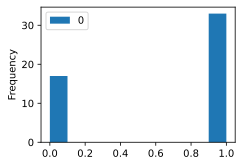

In [ ]:
df.plot.hist()

In [ ]:
import scipy
print(scipy.stats.ttest_1samp(survey_data, 0.5))

# Esta função calcula o teste T para a média de UM grupo de pontuações (scores).
# Este é um teste bilateral para a hipótese nula de que o valor esperado (média) 
# de uma amostra de observações independentes é igual à média populacional dada

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)


Vamos validar os resultados que foram obtidos.

Como sabemos, a estatística t é a razão entre o desvio do valor estimado de um parâmetro de seu valor hipotético para seu erro padrão

In [ ]:
# valor obtido anteriormente: tstat = 2.364321853156195
std_dev=df.std()
print("Standard Deviation: %1.5f"%(std_dev))
sample_size=len(survey_data)
print('Tamanho da amostra: %i'%(sample_size))
sample_stderr = std_dev/ np.sqrt(sample_size)

sample_mean = df.mean()
print("Sample Mean: %1.5f"%(sample_mean))

# valor da hipotese nula
null_hypothesis_mean = 0.5

t_stat = (sample_mean - null_hypothesis_mean) / sample_stderr
print("t_stat: %1.5f"%(t_stat))

Standard Deviation: 0.47852
Tamanho da amostra: 50
Sample Mean: 0.66000
t_stat: 2.36432


In [ ]:
# Vamos criar outros dados

import random
def make_soda_data(n=50):
  return pd.DataFrame([random.randint(0,1) for _ in range(n)])
make_soda_data().describe()

,0
count,50.000000
mean,0.480000
std,0.504672
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
t_statistics = []
p_values = []
n_experiments = 10000

for _ in range(n_experiments):
  df = make_soda_data(n=500)
  ttest = scipy.stats.ttest_1samp(df, 0.5)
  t_statistics.append(ttest.statistic)
  p_values.append(ttest.pvalue)

pd.DataFrame(t_statistics).describe()

,0
count,10000.000000
mean,-0.013539
std,1.004371
min,-3.713766
25%,-0.715192
50%,0.000000
75%,0.625718
max,4.181645


In [ ]:
pd.DataFrame(p_values).describe()

,0
count,10000.000000
mean,0.500868
std,0.289882
min,0.000034
25%,0.245318
50%,0.474825
75%,0.720900
max,1.000000


## Ajuste de modelos paramétricos

Por muitas vezes, queremos avaliar se uma dada distribuição pertence ao um determinado modelo, assim sendo devemos plotar 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


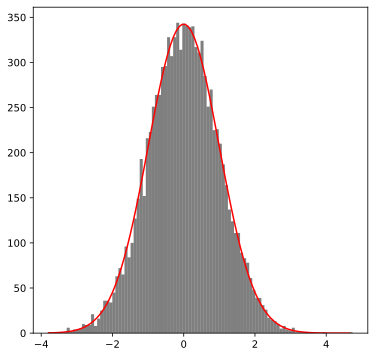

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# criando uma variavel aleatória gaussiana
random.seed(8675309) # por reprodutibilidade
samples = 10000
bins = 100


fig, ax = plt.subplots(figsize=(6,6),nrows=1, ncols=1)

# definições básicas - média 0 e variancia 1
xs = np.random.normal(loc=0, scale=(1)**0.5, size=(samples,))

est_pdf, bins, patches = ax.hist(xs, bins=bins, 
                               color='black',
                               alpha=0.5, 
                               label='$\mu=0, \sigma^2=1$');
                       
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

bins = bins = bins[0:-1]
parameters, covariance = curve_fit(Gauss, bins, est_pdf)

fit_gauss = Gauss(bins, parameters[0], parameters[1])
ax.plot(bins,fit_gauss,'r-')

Parece que ficou bom, mas como avaliar se encaixou?


In [ ]:
import scipy.stats as stats

# test do chi-quadrado para ajustes de modelos
stats.chisquare(f_obs=est_pdf, f_exp=fit_gauss)

Power_divergenceResult(statistic=272.2319130369863, pvalue=4.275256158413515e-18)

Com o valor obtido é menor do que 0,5 (para 95% de confiança) podemos rejeitar a hipótese nula.

Power_divergenceResult(statistic=10.412136941492069, pvalue=0.4051088339117288)

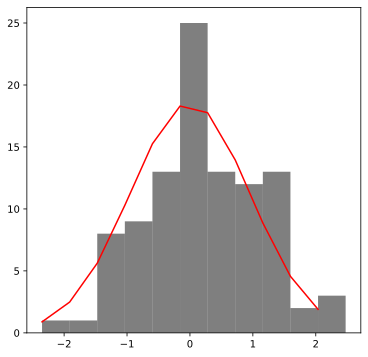

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# criando uma variavel aleatória gaussiana
random.seed(8675309) # por reprodutibilidade
samples = 100
bins = 11


fig, ax = plt.subplots(figsize=(6,6),nrows=1, ncols=1)

# definições básicas - média 0 e variancia 1
xs = np.random.normal(loc=0, scale=(1)**0.5, size=(samples,))

est_pdf, bins, patches = ax.hist(xs, bins=bins, 
                               color='black',
                               alpha=0.5, 
                               label='$\mu=0, \sigma^2=1$');
                       
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

bins = bins = bins[0:-1]
parameters, covariance = curve_fit(Gauss, bins, est_pdf)

fit_gauss = Gauss(bins, parameters[0], parameters[1])
ax.plot(bins,fit_gauss,'r-')

import scipy.stats as stats

# test do chi-quadrado para ajustes de modelos
stats.chisquare(f_obs=est_pdf, f_exp=fit_gauss)

## Validação Cruzada

Nosso objetivo como cientistas de dados é por muitas vezes fazer uma modelagem. No entanto, usar um único conjunto de treinamento e teste muitas vezes não é suficiente. A validação cruzada é considerada o padrão-ouro quando se trata de validar o desempenho do modelo e quase sempre é usada ao ajustar os hiperparâmetros do modelo. A partir daqui, vamos nos concentrar na execução da validação cruzada para validar o desempenho do modelo.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Depois de construir vários modelos de classificação baseados no conjunto de dados `tic_tac_toe`, você percebe que alguns modelos não generalizam tão bem quanto outros. Você criou divisões de treinamento e teste exatamente como foi ensinado, então está curioso para saber por que seu processo de validação não está funcionando.

Depois de tentar um treinamento diferente, divisão de teste, você notou diferentes precisões para seu modelo de aprendizado de máquina. Antes de ficar muito frustrado com os resultados variados, você decidiu ver o que mais poderia estar acontecendo.

### Carga de dados
Vamos carregar dados de jogo da velha para que possamos treinar alguns modelos

In [ ]:
import pandas as pd
tic_tac_toe = pd.read_csv('https://raw.githubusercontent.com/natmourajr/data/main/tic-tac-toe.csv')
tic_tac_toe.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [ ]:
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)
X = tic_tac_toe.drop('Class', axis=1)
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

# Create arrays of predictions
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)

# Print the truth
print('truth')
print(pd.Series(y_test).value_counts())

# Print out count of binary predictions
print('predictions')
print(pd.Series(classification_predictions).value_counts())

# Print the first value from probability_predictions
print('The predicted probabilities are: {}'.format(probability_predictions[0]))

truth
1    498
0    269
Name: Class, dtype: int64
predictions
1    581
0    186
dtype: int64
The predicted probabilities are: [0.14 0.86]


In [ ]:
from sklearn.metrics import precision_score, recall_score

y_pred = rfc.predict(X_test)

print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))

Precision:  [0.88172043 0.81927711]
Recall:  [0.60966543 0.95582329]


Vamos falar um pouco sobre precisão e *recall*

<img align="center" width="600" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png?raw=1">


Depois de construir vários modelos de classificação baseados no conjunto de dados de jogo da velha, você percebe que alguns modelos não generalizam tão bem quanto outros. Você criou divisões de treinamento e teste exatamente como foi ensinado, então está curioso para saber por que seu processo de validação não está funcionando.

Depois de tentar um treinamento diferente, divisão de teste, você notou diferentes precisões para seu modelo de aprendizado de máquina. Antes de ficar muito frustrado com os resultados variados, você decidiu ver o que mais poderia estar acontecendo.

In [ ]:
# Create two different samples of 200 observations
sample1 = tic_tac_toe.sample(n=200, random_state=1111)
sample2 = tic_tac_toe.sample(n=200, random_state=1171)

# Print the number of common observations
print('Number of Common events: ',len([index for index in sample1.index if index in sample2.index]))

# Print the number of observations in the Class column for both samples
print(sample1['Class'].value_counts())
print(sample2['Class'].value_counts())

Number of Common events:  40
positive    134
negative     66
Name: Class, dtype: int64
positive    123
negative     77
Name: Class, dtype: int64


Agora vamos aplicar diferentes métodos de validação cruzada para que possamos entender como o nosso modelo vai responder para diferentes situações

### k-Fold

<img align="center" width="600" src="https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/ea67aa6da30238be774abae9a9d3a7a6117d3003/_notebooks/image/cv.png?raw=1">

In [ ]:
from sklearn.model_selection import KFold

import pandas as pd
import numpy as np
tic_tac_toe = pd.read_csv('https://raw.githubusercontent.com/natmourajr/data/main/tic-tac-toe.csv')

X = tic_tac_toe.drop('Class', axis=1)
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Usando KFold
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1111)

# dividindo o conjunto
splits = kf.split(X)

precision_mat = np.ones([n_folds])
recall_mat = np.ones([n_folds])

for ifold,(train_index, val_index) in enumerate(splits):
  # buscando os conjuntos de treinamento e avaliação
  X_train, y_train = pd.get_dummies(X.loc[train_index,:]), y.loc[train_index]
  X_val, y_val = pd.get_dummies(X.loc[val_index,:]), y.loc[val_index]
  
  rfc = RandomForestClassifier()
    
  # ajuste do modelo
  rfc.fit(X_train, y_train)
    
  # Make predictions, and print the accuracy
  y_pred = rfc.predict(X_val)
  print('Fold: %i'%(ifold))
  print('Precision: ', precision_score(y_val, y_pred, average="macro"))
  print('Recall: ', recall_score(y_val, y_pred, average="macro"))
  precision_mat[ifold] = precision_score(y_val, y_pred, average="macro")
  recall_mat[ifold] = recall_score(y_val, y_pred, average="macro")


from IPython.display import display, Latex

display(Latex(f'$CV\ Precision: %1.3f \pm %1.3f$'%(precision_mat.mean(),precision_mat.std())))
display(Latex(f'$CV\ Recall: %1.3f \pm %1.3f$'%(recall_mat.mean(),recall_mat.std())))

Fold: 0
Precision:  0.9962406015037594
Recall:  0.9916666666666667
Fold: 1
Precision:  0.9834710743801653
Recall:  0.9733333333333334
Fold: 2
Precision:  1.0
Recall:  1.0
Fold: 3
Precision:  0.9732121644095985
Recall:  0.9703069657615113
Fold: 4
Precision:  1.0
Recall:  1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### k-Fold Estratificado pelas classes


<img align="center" width="600" src="https://miro.medium.com/max/562/0*QKJTHrcriSx2ZNYr.png?raw=1">



In [ ]:
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
tic_tac_toe = pd.read_csv('https://raw.githubusercontent.com/natmourajr/data/main/tic-tac-toe.csv')

X = pd.get_dummies(tic_tac_toe.drop('Class', axis=1))
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Usando StratifiedKFold
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds)

# dividindo o conjunto
splits = skf.split(X, y)

precision_mat = np.ones([n_folds])
recall_mat = np.ones([n_folds])

for ifold,(train_index, val_index) in enumerate(splits):
  # buscando os conjuntos de treinamento e avaliação
  X_train, y_train = X.loc[train_index,:], y.loc[train_index]
  X_val, y_val = X.loc[val_index,:], y.loc[val_index]
  
  rfc = RandomForestClassifier()
    
  # ajuste do modelo
  rfc.fit(X_train, y_train)
    
  # Make predictions, and print the accuracy
  y_pred = rfc.predict(X_val)
  print('Fold: %i'%(ifold))
  print('Precision: ', precision_score(y_val, y_pred, average="macro"))
  print('Recall: ', recall_score(y_val, y_pred, average="macro"))
  precision_mat[ifold] = precision_score(y_val, y_pred, average="macro")
  recall_mat[ifold] = recall_score(y_val, y_pred, average="macro")


from IPython.display import display, Latex

display(Latex(f'$CV\ Precision: %1.3f \pm %1.3f$'%(precision_mat.mean(),precision_mat.std())))
display(Latex(f'$CV\ Recall: %1.3f \pm %1.3f$'%(recall_mat.mean(),recall_mat.std())))

Fold: 0
Precision:  0.7419354838709677
Recall:  0.7344877344877345
Fold: 1
Precision:  0.899091459721381
Recall:  0.8933731343283582
Fold: 2
Precision:  0.936802118107517
Recall:  0.9530746268656717
Fold: 3
Precision:  0.9053819444444444
Recall:  0.8962424242424243
Fold: 4
Precision:  0.9664179104477613
Recall:  0.9318181818181819


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit

import pandas as pd
import numpy as np
tic_tac_toe = pd.read_csv('https://raw.githubusercontent.com/natmourajr/data/main/tic-tac-toe.csv')

X = pd.get_dummies(tic_tac_toe.drop('Class', axis=1))
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Usando StratifiedKFold
n_folds = 5
rs = ShuffleSplit(n_splits=n_folds, test_size=.25, random_state=0)

# dividindo o conjunto
splits = rs.split(X, y)

precision_mat = np.ones([n_folds])
recall_mat = np.ones([n_folds])

for ifold,(train_index, val_index) in enumerate(splits):
  # buscando os conjuntos de treinamento e avaliação
  X_train, y_train = X.loc[train_index,:], y.loc[train_index]
  X_val, y_val = X.loc[val_index,:], y.loc[val_index]
  
  rfc = RandomForestClassifier()
    
  # ajuste do modelo
  rfc.fit(X_train, y_train)
    
  # Make predictions, and print the accuracy
  y_pred = rfc.predict(X_val)
  print('Fold: %i'%(ifold))
  print('Precision: ', precision_score(y_val, y_pred, average="macro"))
  print('Recall: ', recall_score(y_val, y_pred, average="macro"))
  precision_mat[ifold] = precision_score(y_val, y_pred, average="macro")
  recall_mat[ifold] = recall_score(y_val, y_pred, average="macro")


from IPython.display import display, Latex

display(Latex(f'$CV\ Precision: %1.3f \pm %1.3f$'%(precision_mat.mean(),precision_mat.std())))
display(Latex(f'$CV\ Recall: %1.3f \pm %1.3f$'%(recall_mat.mean(),recall_mat.std())))

Fold: 0
Precision:  0.9782608695652174
Recall:  0.9593023255813953
Fold: 1
Precision:  0.9903030303030302
Recall:  0.9903030303030302
Fold: 2
Precision:  0.9747628083491462
Recall:  0.9633333333333334
Fold: 3
Precision:  0.9873417721518987
Recall:  0.9767441860465116
Fold: 4
Precision:  0.9724451991355356
Recall:  0.9812485258275021


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
print(X_val.shape)
print(y_val.shape)

(192, 24)
(192,)
